# **Data Preprocessing**

In [41]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Torch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [43]:
# importing dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KDDTrain+.txt',header=None, names=col_names)
#data = pd.read_csv('datasets/KDDTrain+.txt',header=None, names=col_names)

In [44]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [45]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [46]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# number of attack labels
data['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [48]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [49]:
# calling change_label() function
change_label(data)

In [50]:
# distribution of attack classes
data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

# **Data Normalization**

In [51]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [52]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [53]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [54]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [55]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


# **One-hot-encoding**

In [56]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [57]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [58]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# **Multi-class Classification**

In [59]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [60]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [61]:
np.save("/content/drive/MyDrive/DLdataset/le2_classes.npy",le2.classes_,allow_pickle=True)

In [62]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="")
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,False,False,False,False,True,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,False,False,False,False,True,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,False,False,False,False,True,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,False,False,False,False,True,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,True,False,False,False,False,Dos


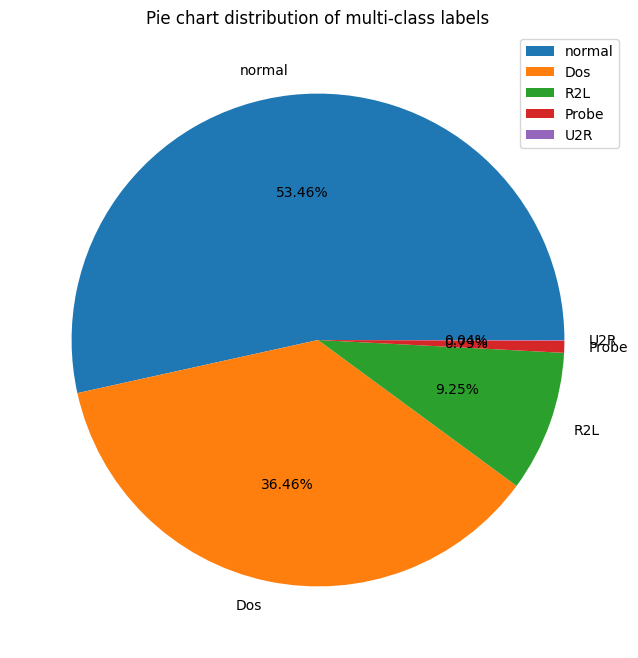

In [63]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

# **Feature Extraction**

In [64]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

<ipython-input-64-090abe360f20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [65]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [66]:
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [67]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [68]:
# saving final dataset to disk
multi_data.to_csv('/content/drive/MyDrive/DLdataset/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,False,...,False,True,False,4,False,False,False,False,True,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,False,...,False,True,False,4,False,False,False,False,True,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,False,...,False,False,False,0,True,False,False,False,False,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,False,...,False,True,False,4,False,False,False,False,True,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,False,...,False,True,False,4,False,False,False,False,True,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,False,...,False,False,False,0,True,False,False,False,False,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,False,...,False,True,False,4,False,False,False,False,True,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,False,...,False,True,False,4,False,False,False,False,True,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,False,...,False,False,False,0,True,False,False,False,False,Dos


# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [101]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [102]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [106]:
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [107]:
# Define the neural network model
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50)
        self.fc2 = nn.Linear(50, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [108]:
# Initialize the model
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
mlp = MLP(input_dim, output_dim)

In [109]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Using Binary Cross Entropy Loss since it's a multi-label classification problem
optimizer = optim.Adam(mlp.parameters())

In [110]:
# Training the model
epochs = 100
batch_size = 5000
history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        optimizer.zero_grad()
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        outputs = mlp(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Calculate training loss and accuracy
    with torch.no_grad():
        train_outputs = mlp(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor)
        train_accuracy = torch.sum(torch.round(train_outputs) == y_train_tensor) / y_train_tensor.numel()

        # Calculate validation loss and accuracy
        val_outputs = mlp(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_accuracy = torch.sum(torch.round(val_outputs) == y_test_tensor) / y_test_tensor.numel()

        history['loss'].append(train_loss.item())
        history['val_loss'].append(val_loss.item())
        history['accuracy'].append(train_accuracy.item())
        history['val_accuracy'].append(val_accuracy.item())

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss}, Val Loss: {val_loss}, Train Acc: {train_accuracy}, Val Acc: {val_accuracy}")


Epoch [1/100], Train Loss: 0.4080902934074402, Val Loss: 0.4083576798439026, Train Acc: 0.800000011920929, Val Acc: 0.800000011920929
Epoch [2/100], Train Loss: 0.2806982696056366, Val Loss: 0.28133922815322876, Train Acc: 0.9144212007522583, Val Acc: 0.9147139191627502
Epoch [3/100], Train Loss: 0.17812488973140717, Val Loss: 0.17937436699867249, Train Acc: 0.9446226358413696, Val Acc: 0.9437416791915894
Epoch [4/100], Train Loss: 0.14011059701442719, Val Loss: 0.14188340306282043, Train Acc: 0.9535791277885437, Val Acc: 0.9523210525512695
Epoch [5/100], Train Loss: 0.1244320347905159, Val Loss: 0.12637531757354736, Train Acc: 0.957370400428772, Val Acc: 0.9562456607818604
Epoch [6/100], Train Loss: 0.1130671352148056, Val Loss: 0.11499100178480148, Train Acc: 0.9608357548713684, Val Acc: 0.9597891569137573
Epoch [7/100], Train Loss: 0.10371488332748413, Val Loss: 0.10559350252151489, Train Acc: 0.964210033416748, Val Acc: 0.9632946252822876
Epoch [8/100], Train Loss: 0.09582918137311

In [111]:
# Save the model
torch.save(mlp.state_dict(), '/content/drive/MyDrive/DLdataset/mlp_multi.pth')

In [112]:
# Evaluation
test_outputs = mlp(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor)
test_accuracy = torch.sum(torch.round(test_outputs) == y_test_tensor) / y_test_tensor.numel()
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Test Loss: 0.033969659358263016, Test Accuracy: 0.9882263541221619


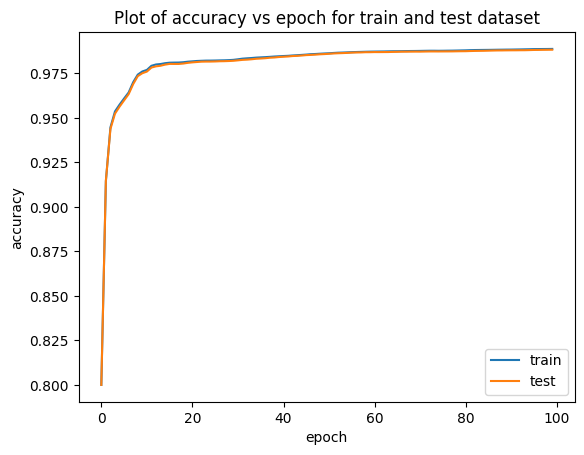

In [113]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

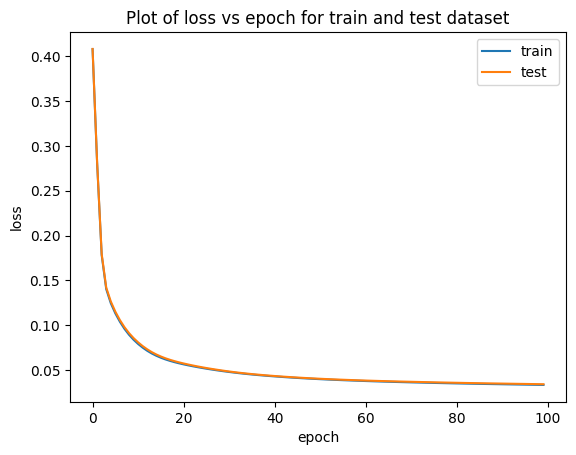

In [114]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

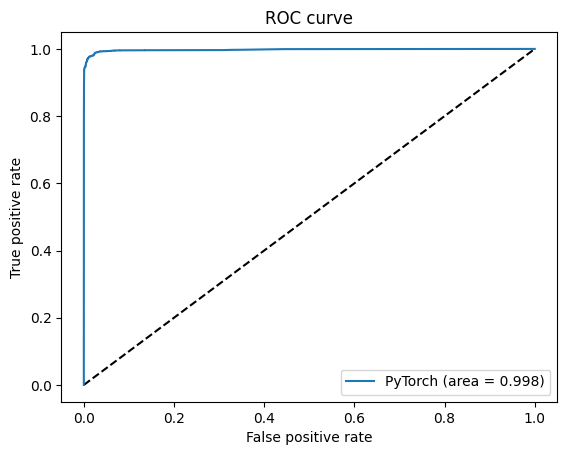

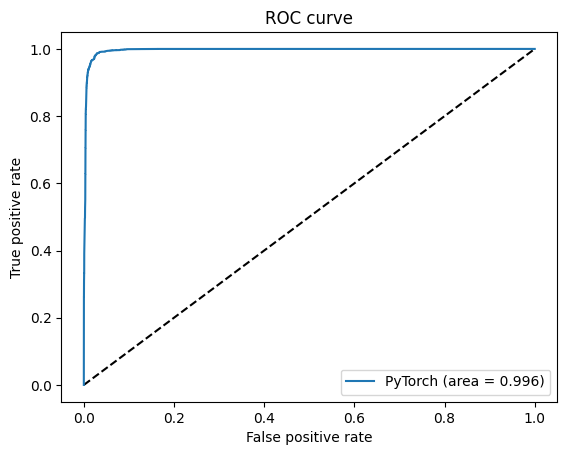

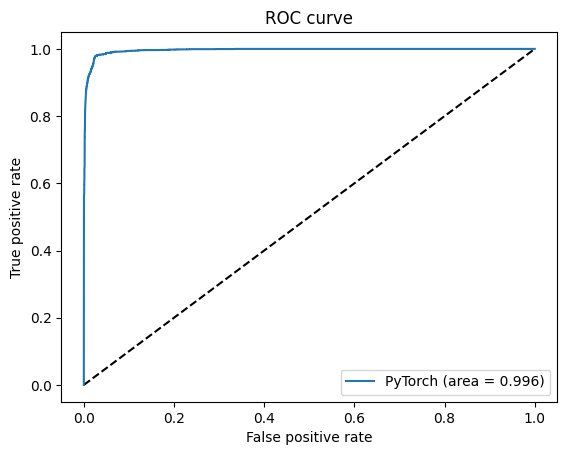

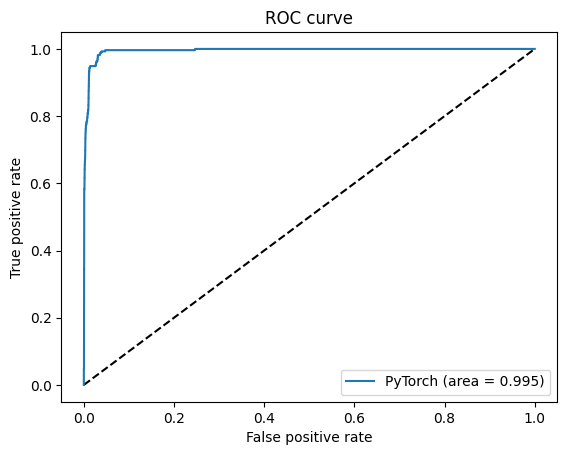

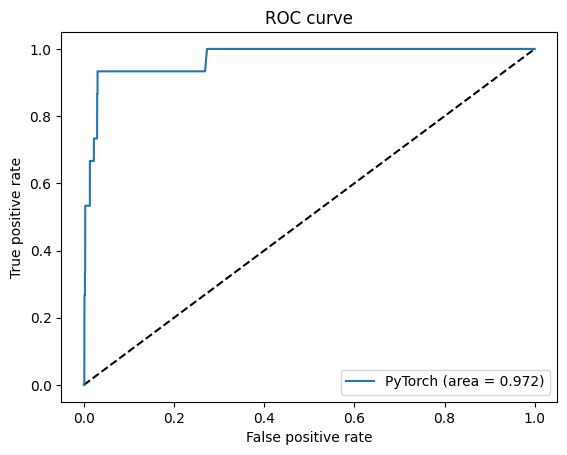

In [115]:
# ROC curves
n_classes = y_train.shape[1]
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test_tensor[:, i], test_outputs[:, i].detach().numpy())
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

for i in range(n_classes):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_mlp[i], tpr_mlp[i], label='PyTorch (area = {:.3f})'.format(roc_auc_mlp[i]))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [116]:
# Predictions
pred_tensor = torch.round(test_outputs).detach().numpy().astype(int)
pred_df = pd.DataFrame(pred_tensor, columns=y_test.columns)

print("Recall Score - ", recall_score(y_test, pred_df, average='micro'))
print("F1 Score - ", f1_score(y_test, pred_df, average='micro'))
print("Precision Score - ", precision_score(y_test, pred_df, average='micro'))

Recall Score -  0.9686289451959104
F1 Score -  0.9705087010466708
Precision Score -  0.9723957669259212


# **Auto Encoder Classifier (Multi-class Classification)**

In [117]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [118]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [121]:
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [122]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [123]:
# Define the Autoencoder Classifier class
class AEClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(AEClassifier, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(input_dim, 48),
            nn.Sigmoid()
        )
        self.output_layer = nn.Sequential(
            nn.Linear(48, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        return x

In [124]:
# Define autoencoder parameters
input_dim = X_train.shape[1]
encoding_dim = 50

In [125]:
# Initialize autoencoder model, criterion, and optimizer
autoencoder = Autoencoder(input_dim, encoding_dim)
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=0.001)


In [126]:
# Train Autoencoder
epochs_ae = 100
losses_ae = []
for epoch in range(epochs_ae):
    optimizer_ae.zero_grad()
    outputs = autoencoder(X_train_tensor)
    loss = criterion_ae(outputs, X_train_tensor)
    loss.backward()
    optimizer_ae.step()
    losses_ae.append(loss.item())

In [127]:
# Define AE classifier parameters
input_dim_classifier = encoding_dim
output_dim_classifier = 5

In [128]:
# Get encoded features
encoded_features = autoencoder.encoder(X_train_tensor).detach()


In [129]:
# Initialize AE Classifier model, criterion, and optimizer
ae_classifier = AEClassifier(input_dim_classifier, output_dim_classifier)
criterion_classifier = nn.MSELoss()
optimizer_classifier = optim.Adam(ae_classifier.parameters(), lr=0.001)


In [130]:
# Train AE Classifier
epochs_classifier = 200
losses_classifier = []
for epoch in range(epochs_classifier):
    optimizer_classifier.zero_grad()
    outputs = ae_classifier(encoded_features)
    loss = criterion_classifier(outputs, y_train_tensor)
    loss.backward()
    optimizer_classifier.step()
    losses_classifier.append(loss.item())


In [131]:
# Evaluate AE Classifier on test data
with torch.no_grad():
    encoded_features_test = autoencoder.encoder(X_test_tensor)
    outputs_test = ae_classifier(encoded_features_test)
    loss_test = criterion_classifier(outputs_test, y_test_tensor)
    accuracy_test = torch.sum(torch.argmax(outputs_test, dim=1) == torch.argmax(y_test_tensor, dim=1)).item() / len(y_test_tensor)

print(f'Test results - Loss: {loss_test.item()} - Accuracy: {accuracy_test*100}%')


Test results - Loss: 0.04660840332508087 - Accuracy: 86.50854130945577%


In [132]:
# Calculate metrics
y_pred = torch.argmax(outputs_test, dim=1).numpy()
y_true = torch.argmax(y_test_tensor, dim=1).numpy()

recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')
precision = precision_score(y_true, y_pred, average='micro')

print("Recall Score - ", recall)
print("F1 Score - ", f1)
print("Precision Score - ", precision)

Recall Score -  0.8650854130945577
F1 Score -  0.8650854130945577
Precision Score -  0.8650854130945577


In [133]:
# Calculate ROC curve
n_classes = output_dim_classifier
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_true == i, y_pred == i)
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])


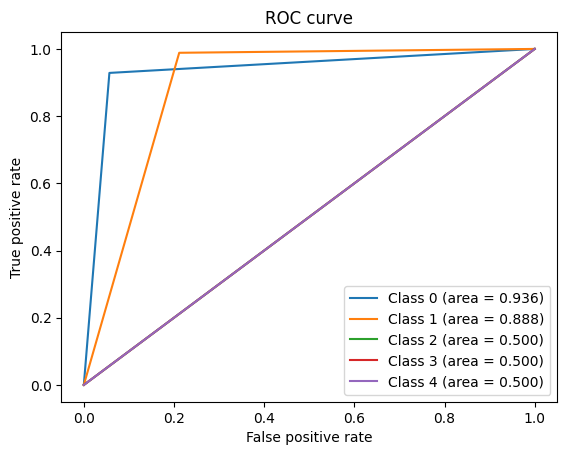

In [134]:
# Plot ROC curves
for i in range(n_classes):
    plt.plot(fpr_ae[i], tpr_ae[i], label='Class {} (area = {:.3f})'.format(i, roc_auc_ae[i]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##LSTM##


In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score



In [137]:
# Define LSTM Classifier class
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Use only the last timestep output
        return out


In [138]:

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [139]:

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)



In [140]:
# Define LSTM parameters
input_dim_lstm = X_train_tensor.shape[1]
hidden_dim_lstm = 64
output_dim_lstm = 5  # Number of classes



In [141]:
# Initialize LSTM model, criterion, and optimizer
lstm_model = LSTMClassifier(input_dim_lstm, hidden_dim_lstm, output_dim_lstm)
criterion_lstm = nn.CrossEntropyLoss()
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)



In [147]:
# Train LSTM
epochs_lstm = 10
for epoch in range(epochs_lstm):
    total_loss = 0.0
    for i, (inputs, labels_one_hot) in enumerate(train_loader):
        optimizer_lstm.zero_grad()
        outputs = lstm_model(inputs.unsqueeze(1))  # Add sequence length dimension

        # Convert one-hot encoded labels to class indices
        labels = torch.argmax(labels_one_hot, dim=1).long()

        loss = criterion_lstm(outputs, labels)
        loss.backward()
        optimizer_lstm.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs_lstm}], Average Loss: {average_loss:.4f}")

    # Print total loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs_lstm}], Total Loss: {total_loss:.4f}")


Epoch [1/10], Average Loss: 0.0597
Epoch [1/10], Total Loss: 88.1533
Epoch [2/10], Average Loss: 0.0590
Epoch [2/10], Total Loss: 87.1980
Epoch [3/10], Average Loss: 0.0586
Epoch [3/10], Total Loss: 86.4893
Epoch [4/10], Average Loss: 0.0582
Epoch [4/10], Total Loss: 85.9795
Epoch [5/10], Average Loss: 0.0580
Epoch [5/10], Total Loss: 85.6268
Epoch [6/10], Average Loss: 0.0576
Epoch [6/10], Total Loss: 85.0770
Epoch [7/10], Average Loss: 0.0573
Epoch [7/10], Total Loss: 84.7018
Epoch [8/10], Average Loss: 0.0568
Epoch [8/10], Total Loss: 83.9198
Epoch [9/10], Average Loss: 0.0567
Epoch [9/10], Total Loss: 83.7088
Epoch [10/10], Average Loss: 0.0561
Epoch [10/10], Total Loss: 82.8077


In [150]:
# Convert one-hot encoded labels to class indices
y_test_indices = torch.argmax(y_test_tensor, dim=1)

# Evaluate LSTM on test data
with torch.no_grad():
    outputs_test = lstm_model(X_test_tensor.unsqueeze(1))
    _, predicted = torch.max(outputs_test, 1)
    correct = (predicted == y_test_indices).sum().item()
    total = y_test_indices.size(0)
    accuracy_test = correct / total

print(f'Test accuracy: {accuracy_test * 100}%')


Test accuracy: 97.96786689528165%


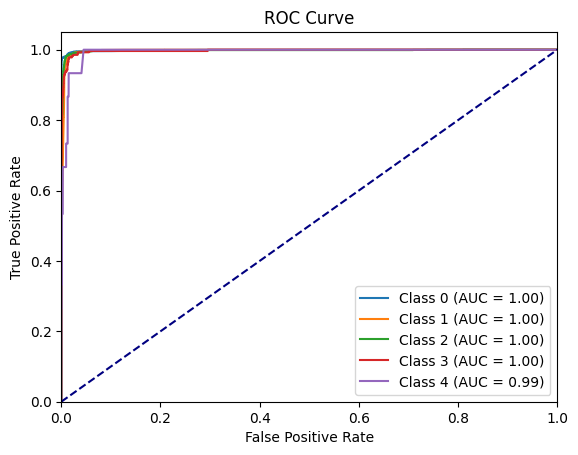

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for each class using softmax
softmax = nn.Softmax(dim=1)
with torch.no_grad():
    outputs_test_prob = softmax(outputs_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(output_dim_lstm):
    fpr[i], tpr[i], _ = roc_curve(y_test_indices == i, outputs_test_prob[:, i].numpy())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(output_dim_lstm):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Epoch [1/10], Average Loss: 0.0563
Epoch [1/10], Total Loss: 83.0981
Epoch [2/10], Average Loss: 0.0561
Epoch [2/10], Total Loss: 82.8469
Epoch [3/10], Average Loss: 0.0555
Epoch [3/10], Total Loss: 82.0451
Epoch [4/10], Average Loss: 0.0556
Epoch [4/10], Total Loss: 82.1494
Epoch [5/10], Average Loss: 0.0554
Epoch [5/10], Total Loss: 81.8878
Epoch [6/10], Average Loss: 0.0549
Epoch [6/10], Total Loss: 81.0869
Epoch [7/10], Average Loss: 0.0550
Epoch [7/10], Total Loss: 81.2007
Epoch [8/10], Average Loss: 0.0545
Epoch [8/10], Total Loss: 80.5672
Epoch [9/10], Average Loss: 0.0544
Epoch [9/10], Total Loss: 80.3879
Epoch [10/10], Average Loss: 0.0542
Epoch [10/10], Total Loss: 80.1082


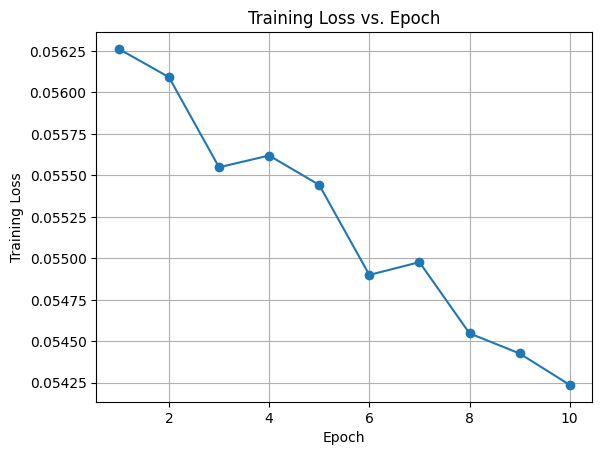

In [152]:
import matplotlib.pyplot as plt

# Initialize empty lists to store loss values
train_losses = []

# Train LSTM
epochs_lstm = 10
for epoch in range(epochs_lstm):
    total_loss = 0.0
    for i, (inputs, labels_one_hot) in enumerate(train_loader):
        optimizer_lstm.zero_grad()
        outputs = lstm_model(inputs.unsqueeze(1))  # Add sequence length dimension

        # Convert one-hot encoded labels to class indices
        labels = torch.argmax(labels_one_hot, dim=1).long()

        loss = criterion_lstm(outputs, labels)
        loss.backward()
        optimizer_lstm.step()

        total_loss += loss.item()

    # Store average loss for the epoch
    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs_lstm}], Average Loss: {average_loss:.4f}")

    # Print total loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs_lstm}], Total Loss: {total_loss:.4f}")

# Plot loss vs. epoch
plt.plot(range(1, epochs_lstm + 1), train_losses, marker='o', linestyle='-')
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()
